In [63]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.units as u
import astropy.constants as const

In [64]:
def wd_envelope_mass(m_dwarf, alpha=1):
    log_lstar = 4.59 + np.log10(m_dwarf) + np.log10(alpha)
    l_star = 10**log_lstar
    # print(l_star)
    mass_envelope = 5.18 * (l_star / 1e-2) ** (5 / 8) * (m_dwarf) ** (-7 / 8)
    mass_envelope *= 1e-5  # solar masses
    return mass_envelope


def wd_radius(mass):
    r_wd = 1e-2 * 1.28 * (mass) ** (-1 / 3)
    return r_wd


# def wd_envelope_mass(m_dwarf, alpha=1, mu_e=2):
#     # log_lstar = 4.59 + np.log10(m_dwarf) + np.log10(alpha)
#     # l_star = 10**log_lstar
#     # print(l_star)
#     # mass_envelope = 5.18 * (l_star / 1e-2) ** (5 / 8) * (m_dwarf) ** (-7 / 8)
#     # mass_envelope *= 1e-5  # solar masses
#     # return mass_envelope
#     log_lstar = 4.59 + np.log10(m_dwarf) + np.log10(alpha)
#     l_star = 10**log_lstar
#     lum_term = (l_star / 1e-2) ** (5 / 8)

#     eta_nuc = 0.009
#     mlandau = 1.88 * u.Msun
#     rlandau = 7.89e-6 * u.Rsun
#     mass_proton = const.m_p.to(u.g)  # mass of proton in grams
#     mass_electron = const.m_e.to(u.g)
#     rwd = (
#         0.710
#         * rlandau
#         * (2 / mu_e) ** (5 / 3)
#         * (mass_proton / mass_electron) ** (1 / 3)
#         * (m_dwarf*  u.Msun / mlandau)
#     ).value
#     radius_term = (rwd / 1e-2)**(3/2)
#     mass_term = (1/ m_dwarf)**(3/8)
#     m_envelope = 3.58e-5 * lum_term * radius_term * mass_term
#     return m_envelope

envelope masses in solar masses [0.80972446 0.71995817 0.6808944  0.64395016 0.62821744]


[Text(0.5, 0, 'White Dwarf Mass ($M_\\odot$)'),
 Text(0, 0.5, 'Envelope Mass ($M_\\odot$)')]

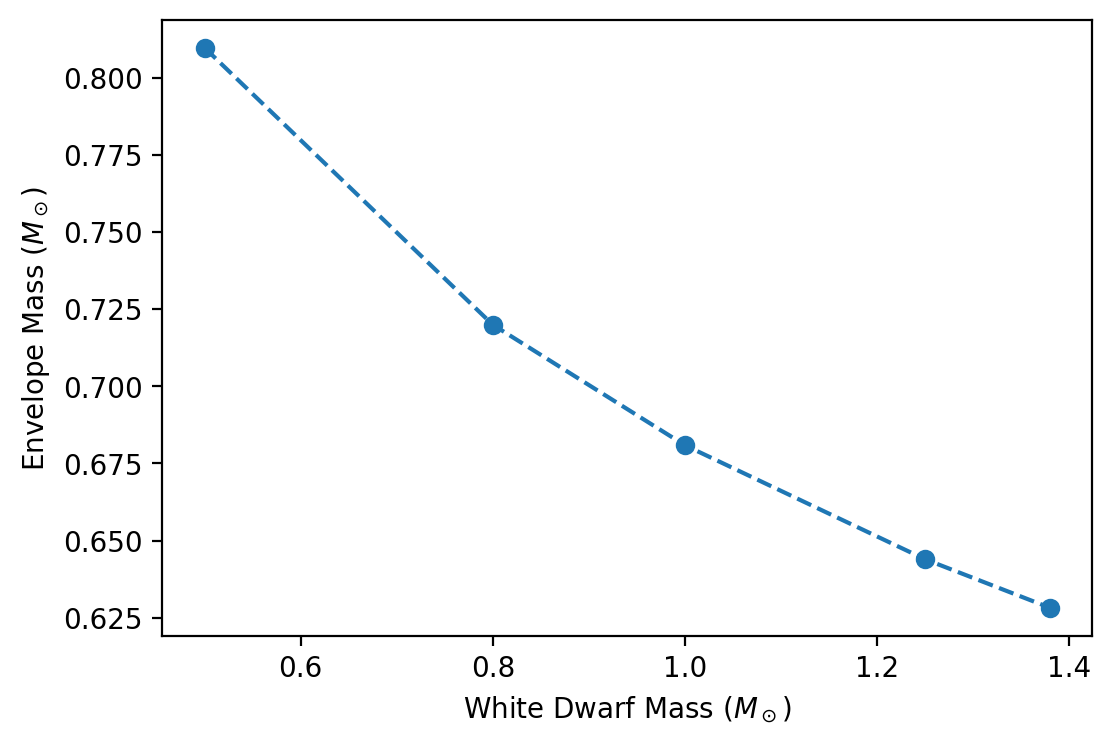

In [65]:
whitedwarf_masses = np.array([0.5, 0.8, 1.0, 1.25, 1.38])
envelope_masses = wd_envelope_mass(whitedwarf_masses)
print("envelope masses in solar masses", envelope_masses)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 4), dpi=200)
ax.plot(
    whitedwarf_masses,
    envelope_masses,
    marker="o",
    linestyle="--",
    color="tab:blue",
)

ax.set(xlabel="White Dwarf Mass ($M_\odot$)", ylabel="Envelope Mass ($M_\odot$)")

m_wd [0.5  0.75 1.   1.25 1.5 ] solMass
m_envelope [0.80972446 0.73166864 0.6808944  0.64395016 0.61525754] solMass
rwd [0.01612699 0.01408822 0.0128     0.01188247 0.01118183] solRad
dimensionless fraction of energy released by burning [0.00500145 0.00858785 0.01260287 0.01697003 0.02164002]
binding energy of envelope [4.76123379e+49 7.38728811e+49 1.00887030e+50 1.28475756e+50
 1.56531183e+50] erg
m_wd [0.5  0.75 1.   1.25 1.5 ] solMass
m_envelope [0.80972446 0.73166864 0.6808944  0.64395016 0.61525754] solMass
rwd [0.01612699 0.01408822 0.0128     0.01188247 0.01118183] solRad
dimensionless fraction of energy released by burning [0.01261228 0.01619868 0.0202137  0.02458087 0.02925085]
binding energy of envelope [4.76123379e+49 7.38728811e+49 1.00887030e+50 1.28475756e+50
 1.56531183e+50] erg
m_wd [0.5  0.75 1.   1.25 1.5 ] solMass
m_envelope [0.80972446 0.73166864 0.6808944  0.64395016 0.61525754] solMass
rwd [0.01612699 0.01408822 0.0128     0.01188247 0.01118183] solRad
dimensionl

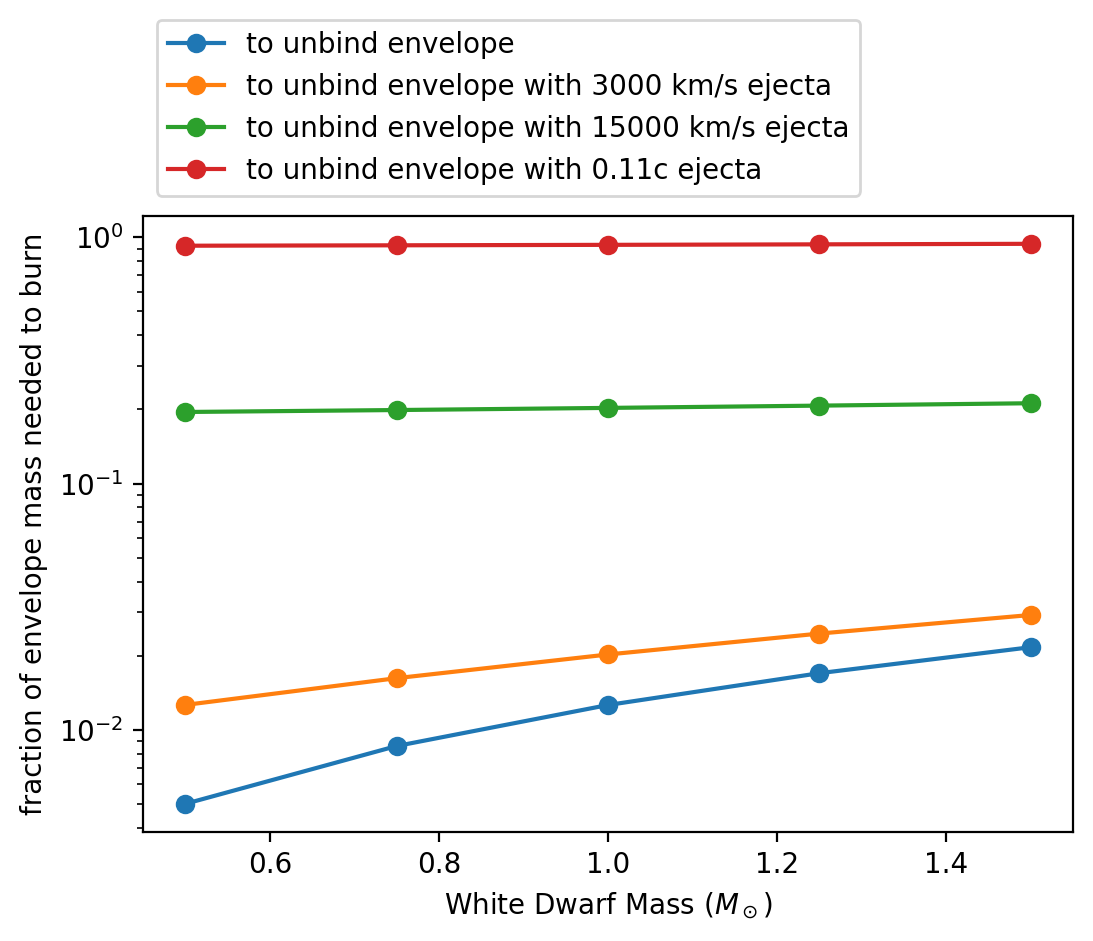

In [69]:
def frac_burning(mwd, mu_e=2, v_eject=0):
    # convert to solar masses
    eta_nuc = 0.009
    mlandau = 1.88 * u.Msun
    rlandau = 7.89e-6 * u.Rsun
    mass_proton = const.m_p.to(u.g)  # mass of proton in grams
    mass_electron = const.m_e.to(u.g)

    # rwd = (
    #     0.710
    #     * rlandau
    #     * (2 / mu_e) ** (5 / 3)
    #     * (mass_proton / mass_electron) ** (1 / 3)
    #     * (mwd*  u.Msun / mlandau)
    # ) # this does not work
    rwd = wd_radius(mwd) * u.Rsun
    m_envelope = wd_envelope_mass(mwd) * u.Msun  # in solar masses

    mwd = mwd * u.Msun
    bigG = const.G.to(u.Rsun**3 / (u.Msun * u.s**2))
    # r_wd = (1e-2 * 1.28) * (mwd / u.Msun) ** (- 1 / 3) *u.Rsun # in solar radius
    envelope_binding_energy = (bigG * mwd * m_envelope) / (2 * rwd)

    # calculate energy generated per gram of pp-chain
    delta_mas = 4 * const.m_p - 6.6464731e-24 * u.g
    energy_per_reaction = delta_mas * const.c**2
    energy_per_hydrogen_mass_burned = energy_per_reaction / (4 * const.m_p)
    energy_per_hydrogen_mass_burned = energy_per_hydrogen_mass_burned.to("erg/Msun")
    e_kin = 0.5 * m_envelope * (v_eject * u.km / u.s) ** 2
    # calculate fraction of energy rneeded to unbind envelope
    f_nuc = (envelope_binding_energy.to("erg") + e_kin.to(u.g * (u.cm / u.s) ** 2)) / (
        energy_per_hydrogen_mass_burned * m_envelope
    )

    # f_nuc = envelope_binding_energy / (
    #     eta_nuc * mwd * const.c.to(u.Rsun / u.s) ** 2
    # )  # dimensionless fraction of energy released by burning
    print("m_wd", mwd)
    print("m_envelope", m_envelope)
    print("rwd", rwd)
    print("dimensionless fraction of energy released by burning", f_nuc)

    print("binding energy of envelope", envelope_binding_energy.to("erg"))
    return f_nuc

c = const.c.to(u.km / u.s).value
masses = np.array([0.5, 0.75, 1., 1.25, 1.5])
f = frac_burning(masses)
f_3000kms = frac_burning(masses, v_eject=3000)
f_15000kms = frac_burning(masses, v_eject=15000)
f_c = frac_burning(masses, v_eject=c* 0.11)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 4), dpi=200)
ax.plot(
    masses,
    f,
    marker="o",

    label="to unbind envelope",
)
ax.plot(
    masses,
    f_3000kms,
    marker="o",

    label="to unbind envelope with 3000 km/s ejecta",
)
ax.plot(
    masses,
    f_15000kms,
    marker="o",

    label="to unbind envelope with 15000 km/s ejecta",
)
ax.plot(
    masses,
    f_c,
    marker="o",
    label="to unbind envelope with 0.11c ejecta",
)
ax.set(
    xlabel="White Dwarf Mass ($M_\odot$)",
    ylabel="fraction of envelope mass needed to burn",
    yscale="log",
)
ax.legend(loc = "lower left", bbox_to_anchor=(0, 1.01))
plt.show()